<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.304 · Inteligencia Artificial Avanzada / M0.539 · Inteligencia Artificial</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática / MU Ingeniería Computacional y Matemática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## Código del capítulo 3: Extracción y selección de atributos

Código 3.1: ejemplo diagonalización en Python


In [ ]:
from numpy import *

A = array([[1, 2, 3],[4, 5, 6],[7, 8, 9]])


In [ ]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
val,vec = linalg.eig(A)

In [ ]:
val

array([ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16])

In [ ]:
vec

array([[-0.23197069, -0.78583024,  0.40824829],
       [-0.52532209, -0.08675134, -0.81649658],
       [-0.8186735 ,  0.61232756,  0.40824829]])

In [ ]:
dot(A,vec[:,0])

array([ -3.73863537,  -8.46653421, -13.19443305])

In [ ]:
val[0]*vec[:,0]

array([ -3.73863537,  -8.46653421, -13.19443305])

Código 3.2: ejemplo SVD en Python

In [ ]:
import numpy as np

In [ ]:
A = array([[1,3,5,7],[2,4,6,8]]).T

In [ ]:
A

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
U,S,Vt = np.linalg.svd(A,full_matrices=True)

In [ ]:
U

array([[-0.15248323, -0.82264747, -0.39450102, -0.37995913],
       [-0.34991837, -0.42137529,  0.24279655,  0.80065588],
       [-0.54735351, -0.0201031 ,  0.69790998, -0.46143436],
       [-0.74478865,  0.38116908, -0.5462055 ,  0.04073761]])

In [ ]:
S

array([14.2690955 ,  0.62682823])

In [ ]:
Vt

array([[-0.64142303, -0.7671874 ],
       [ 0.7671874 , -0.64142303]])

In [ ]:
S1 = zeros((4,2))

In [ ]:
S1[:2,:2] = diag(S)

In [ ]:
S1

array([[14.2690955 ,  0.        ],
       [ 0.        ,  0.62682823],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [ ]:
S1.shape

(4, 2)

In [ ]:
allclose(A, dot(U, dot(S1, Vt)))

True

Código 3.3: descomposición de una matriz en sus componentes SVD

In [ ]:
import numpy as np

In [ ]:
# example from: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html
A = np.array([[1, 2, 3,],[4, 5, 6], [7, 8, 9]])
#np.random.randn(9, 6) + 1j*np.random.randn(9, 6)

In [ ]:
U, s, V = np.linalg.svd(A, full_matrices=True)


In [ ]:
U.shape, S.shape, V.shape

((3, 3), (3, 3), (3, 3))

In [ ]:
S = np.zeros((3, 3), dtype=complex)


In [ ]:
S[:3, :3] = np.diag(s)


In [ ]:
np.allclose(A, np.dot(U, np.dot(S, V)))

True

In [ ]:
np.dot(U, np.dot(S, V))

array([[1.+0.j, 2.+0.j, 3.+0.j],
       [4.+0.j, 5.+0.j, 6.+0.j],
       [7.+0.j, 8.+0.j, 9.+0.j]])

In [ ]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Código 3.4: SVD permite calcular los valores y vectores propios de la matriz


In [ ]:
from numpy import *
A = array([[1, 2, 3],[4, 5, 6],[7, 8, 10]])

In [ ]:
cov_A = dot(A.T,A)

In [ ]:
cov_A

array([[ 66,  78,  97],
       [ 78,  93, 116],
       [ 97, 116, 145]])

In [ ]:
val,vec = linalg.eig(cov_A)

In [ ]:
U,S,Vt = linalg.svd(A)

In [ ]:
val

array([3.03195336e+02, 7.65907389e-01, 3.87564271e-02])

In [ ]:
S*S.T

array([3.03195336e+02, 7.65907389e-01, 3.87564271e-02])

In [ ]:
vec

array([[-0.46466755, -0.83328635,  0.2995295 ],
       [-0.55375455,  0.00949949, -0.83262576],
       [-0.69097031,  0.55275999,  0.46585022]])

In [ ]:
Vt.T

array([[-0.46466755, -0.83328635,  0.2995295 ],
       [-0.55375455,  0.00949949, -0.83262576],
       [-0.69097031,  0.55275999,  0.46585022]])

Código 3.5: ejemplo de PCA en Python

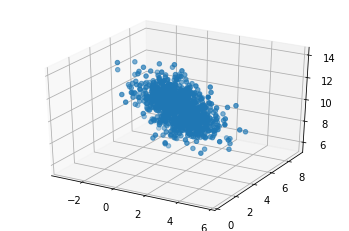

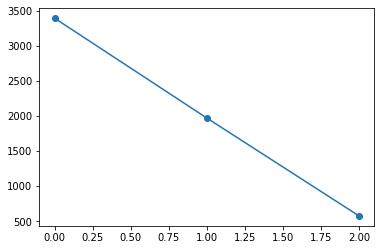

In [ ]:
# -*- coding: utf-8 -*-
from numpy import *
import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plot
set_printoptions(precision = 3)

# Datos: distribución normal multivariada en 3d 
mean = [1,5,10]
cov = [[2,-1,0],[-1,2,-1],[0,-1,2]]
d = random.multivariate_normal(mean,cov,1000)

# representación gráfica de los datos:
fig1 = plot.figure()
sp = fig1.add_subplot(projection = '3d')
sp.scatter(d[:,0],d[:,1],d[:,2])
plot.show()

# ANALISIS PCA:
# Paso 1: Calcular la matriz de covarianza de los datos (N x N):
d1 = d - d.mean(0)
matcov = dot(d1.transpose(),d1)

# Paso 2: Obtener los valores y vectores propios de la matrix de covarianza:
valp1,vecp1 = linalg.eig(matcov)

# Paso 3: Decidir qué vectores son los relevantes representando
# los valores propios en orden decreciente (scree plot):
ind_creciente = argsort(valp1) # orden creciente 
ind_decre = ind_creciente[::-1] # orden decreciente 
val_decre = valp1[ind_decre] # valores propios en orden decreciente
vec_decre = vecp1[:,ind_decre] # ordenar tambien vectores propios
pylab.plot(val_decre,'o-')
pylab.show()



In [ ]:

# Proyectar datos a la nueva base definida por los 
# todos los vectores propios (espacio PCA 3D)
d_PCA = zeros((d.shape[0],d.shape[1]))
for i in range(d.shape[0]):
    for j in range(d.shape[1]):
        d_PCA[i,j] = dot(d1[i,:],vecp1[:,j])

# recuperar datos originales invirtiendo la proyección (reconstrucción):
orig_means = d.mean(0)
d_recon = zeros((d.shape[0],d.shape[1]))
for i in range(d.shape[0]):
    d_recon[i] = orig_means
    for j in range(d.shape[1]):
         d_recon[i] += d_PCA[i,j]*vecp1[:,j]

# comprobar que se recuperan los datos originales:
allclose(d,d_recon)


True

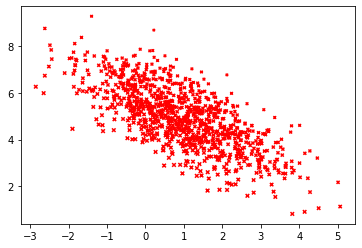

In [ ]:
# Proyectar datos a la nueva base definida por los dos
# vectores propios con mayor valor propio (espacio PCA 2D)
d_PCA2 = zeros((d.shape[0],2))
for i in range(d.shape[0]):
    for j in range(2):
        d_PCA2[i,j] = dot(d1[i,:],vec_decre[:,j])

# reconstruir datos invirtiendo la proyección PCA 2D:
d_recon2 = zeros((d.shape[0],3))
for i in range(d.shape[0]):
    d_recon2[i] = orig_means
    for j in range(2):
         d_recon2[i] += d_PCA2[i,j]*vec_decre[:,j] 

# En general dará falso por el error introducido al descartar
# una componente
allclose(d,d_recon2)

# representación gráfica de los datos:
fig2 = plot.figure()
#sp2 = fig2.add_subplot(projection = '2d')
plot.scatter(d_recon2[:,0],d_recon2[:,1],d_recon2[:,2],c='r',marker='x')
plot.show()


Código 3.6: ejemplo de PCA en Python utilizando las librerías sklearn

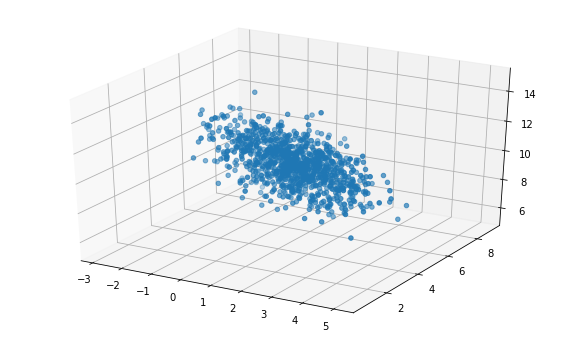

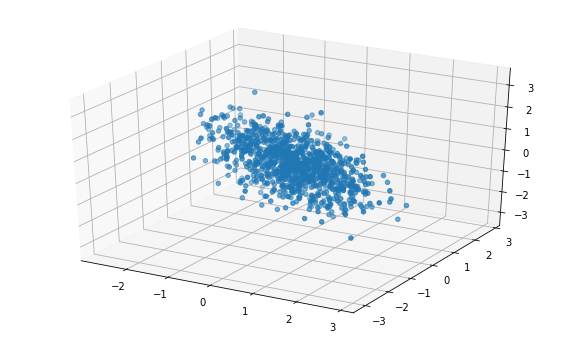

In [ ]:
# –∗– coding : utf –8 –∗–
from numpy import *
import matplotlib.pyplot as plot
set_printoptions(precision = 3)

# Datos: distribución normal multivariada en 3d
mean = [1,5,10]
cov = [[2,-1,0],[-1,2,-1],[0,-1,2]]
d = random.multivariate_normal(mean,cov,1000)

# representación gráfica de los datos:
fig1 = plot.figure(1,figsize=(10, 6))
sp = fig1.add_subplot(projection = '3d')
sp.scatter(d[:,0],d[:,1],d[:,2])
plot.show()

# ANALISIS PCA:
# Estandarizacion de los datos ( d1 = (d - d.mean(0))/d.std(0) ):
from sklearn import preprocessing
d1 = preprocessing.scale(d)

# representación gráfica de los datos estandarizados:
fig0 = plot.figure(1,figsize=(10, 6))
sp = fig0.add_subplot(projection = '3d')
sp.scatter(d1[:,0],d1[:,1],d1[:,2])
plot.show()



In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca1 = PCA()
pca1.fit(d1)

# VARIANZA EN LOS DATOS EXPLICADA AL AÑADIR CADA COMPONENTE:
print(cumsum(pca1.explained_variance_ratio_))



[0.579 0.905 1.   ]


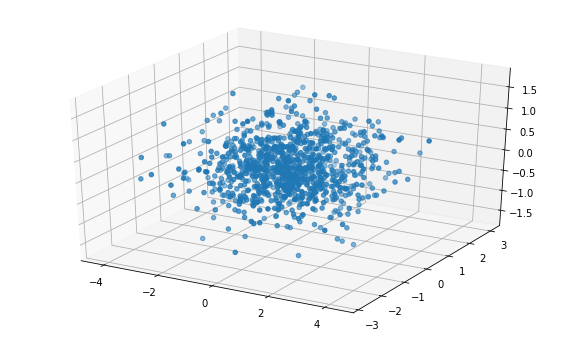

In [ ]:
# Representar los datos en el espacio PCA:
X = pca1.transform(d1)

fig2 = plot.figure(1, figsize=(10, 6))
ax = fig2.add_subplot(projection = '3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

Código 3.7: importancia de escalar las variables antes de aplicar un análisis PCA

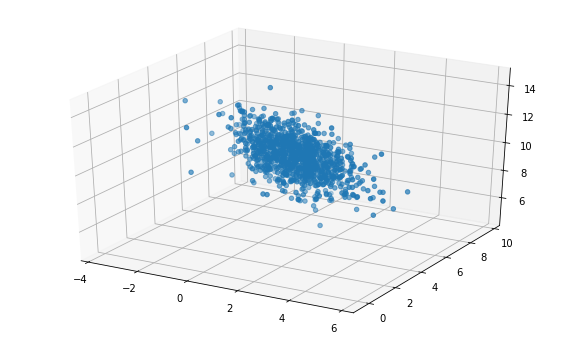

[0.58  0.322 0.098]
[0.575 0.328 0.097]


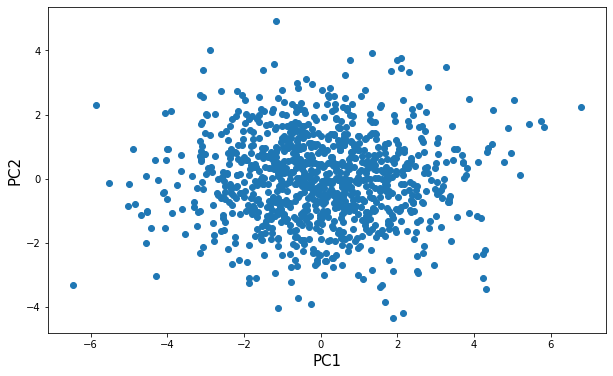

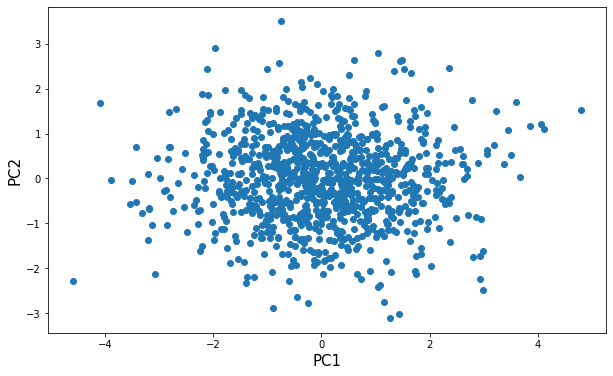

In [ ]:
# –∗– coding : utf –8 –∗–
from numpy import *
import matplotlib.pyplot as plot
set_printoptions(precision = 3)

# Datos: distribución normal multivariada en 3d
mean = [1,5,10]
cov = [[2,-1,0],[-1,2,-1],[0,-1,2]]
d = random.multivariate_normal(mean,cov,1000)

# ANALISIS PCA:
# Estandarizacion de los datos ( d1 = (d - d.mean(0))/d.std(0) ):
from sklearn import preprocessing
d1 = preprocessing.scale(d)

# Representación gráfica de los datos
fig1 = plot.figure(1, figsize=(10, 6))
ax = fig1.add_subplot(projection = '3d')
ax.scatter(d[:, 0], d[:, 1], d[:, 2])
plot.show()

import numpy as np
from sklearn.decomposition import PCA
pca1 = PCA(n_components=3)
pca1.fit(d)
X = pca1.transform(d)
print(pca1.explained_variance_ratio_)

# Reducción de dimensionalidad. Proyección PCA 2D:
pca2 = PCA(n_components=3)
pca2.fit(d1)
X_scaled = pca2.transform(d1)
print(pca2.explained_variance_ratio_)

# Reducción de dimensionalidad
# Proyección PCA (datos sin escalar)
pca3 = PCA(n_components=2)
pca3.fit(d)
X_pca3 = pca3.transform(d)

fig2 = plot.figure(1, figsize=(10, 6))
ax = fig2.gca()
ax.scatter(X_pca3[:, 0], X_pca3[:, 1])
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
plot.show()

# Proyección PCA (datos escalados)
pca4 = PCA(n_components=2)
pca4.fit(d1)
X_pca4 = pca4.transform(d1)

fig3 = plot.figure(1, figsize=(10, 6))
ax = fig3.gca()
ax.scatter(X_pca4[:, 0], X_pca4[:, 1])
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
plot.show()

Código 3.8: aplicación de PCA a una secuencia de imágenes

Añadir acceso al drive desde colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

Cambiar de directorio de trabajo para cargar los datos:

In [ ]:
cd /content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/

/content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb


In [ ]:
pwd

'/content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb'

image found: microphone-1209816_1920
image found: children-5833685_1920
image found: deer-5973385_1920
image found: buildings-5941345_1920


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in sqrt


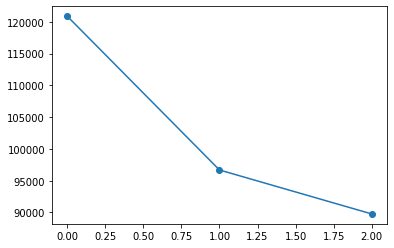

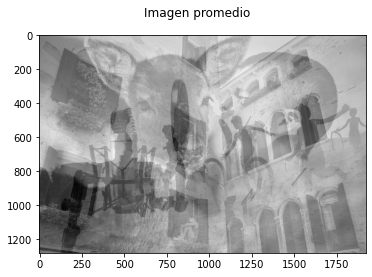

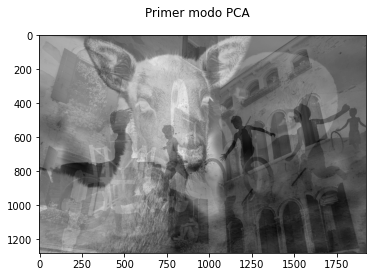

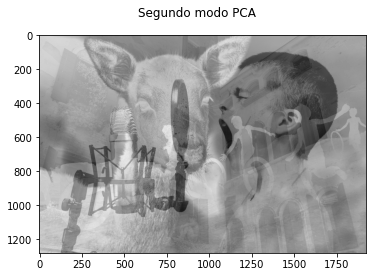

In [ ]:
import os
from PIL import Image
import numpy
import pylab
import matplotlib.pyplot as plt

###############################
# COSNTRUIR MATRIZ DE DATOS
###############################

# Obtener directorio actual en el que están las imágenes (pwd + /pca_im/)
path = os.getcwd() + "/pca_im/"  
dirList=os.listdir(path)

# construir una lista con los ficheros con extensión '.jpg'
imlist = []
i = 0
for fname in dirList:
    filename, filext = os.path.splitext(fname)
    if filext == '.jpg':
        imlist.append(fname) 
        i = i +1
        print("image found: " + filename)
          
# Abrir la primera imagen y obtener su tamaño en píxeles
im = numpy.array(Image.open(path + imlist[0])) 
m,n = im.shape[0:2]

NPIX = n*m    # Numero de píxeles de cada imagen:
NIM = len(imlist) # Numero de imágenes a analizar:

# Crear una matriz de tamaño NIM x NPIX:
A = numpy.array([numpy.array(Image.open(path + imlist[i]).convert('L')).flatten()
                     for i in range(NIM)],'f')

###############################
# ANALISIS PCA
###############################

# Centrado de los datos restando la media:
im_media = A.mean(axis=0)
for i in range(NIM):
      A[i] -= im_media

M = dot(A,A.T) # matriz AA' (NIM x NIM)
lam,vec = linalg.eigh(M) # obtener los NIM vectores y valores propios de M = AA'
aux = dot(A.T,vec).T # aplicar w = A'v para obtener los vectores propios de A'A 
V = aux[::-1] # ordenar vectores propios 
S = sqrt(lam)[::-1] # ordenar valores propios de A 

# Recomponer la imagen media:
im_media = im_media.reshape(m,n)

# Representar los autovalores PCA
pylab.plot(S[0:10],'o-')

# Obtener los dos primeros modos PCA y representarlos:
modo1 = V[0].reshape(m,n) 
modo2 = V[1].reshape(m,n)

# Representar graficamente:
fig1 = pylab.figure()
fig1.suptitle('Imagen promedio')
pylab.gray()
pylab.imshow(im_media)
##
fig2 = pylab.figure()
fig2.suptitle('Primer modo PCA')
pylab.gray()
pylab.imshow(modo1)
##
fig3 = pylab.figure()
fig3.suptitle('Segundo modo PCA')
pylab.gray()
pylab.imshow(modo2)
pylab.show()



Código 3.9: ejemplo de aplicación de PCA para el análisis de imágenes

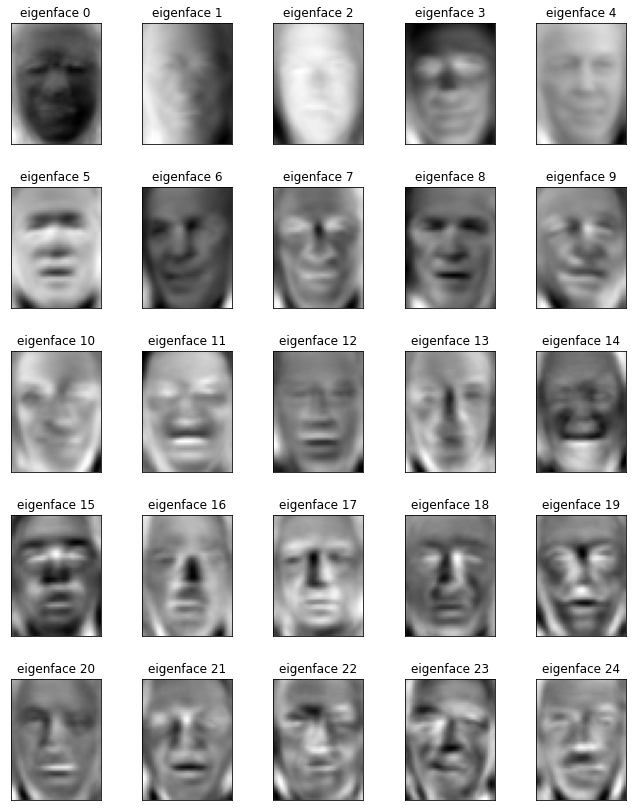

In [ ]:
# –∗– coding : utf –8 –∗–
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Obtener las imágenes de la base de datos:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# ontener numero de imagenes y tamaño:
n_samples, h, w = lfw_people.images.shape

# Cargar los datos:
X = lfw_people.data

# numero de variables originales:
n_features = X.shape[1]

# numero de variables espacio PCA reducido:
n_components = 150

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)
eigenfaces = pca.components_.reshape((n_components, h, w))

# Representar las eigenfaces más representativas:
n_row=5
n_col=5
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]

plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(eigenface_titles[i], size=12)
    plt.xticks(())
    plt.yticks(())
plt.show()

Código 3.10: cálculo de histograma y función densidad de probabilidad
en Python

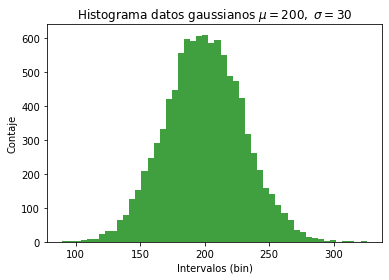

In [ ]:
import numpy as np
import matplotlib.mlab as mlab
import pylab
from scipy.stats import norm

# datos gaussianos media mu desviación estandard sigma:
mu, sigma = 200, 30
y_datos = mu + sigma*np.random.randn(10000)

# histograma recuento de valores en cada bin:
nbins = 50 #número de intérvalos

fig1 = pylab.figure()
n, bins, patches = pylab.hist(y_datos, nbins, facecolor='green', alpha=0.75)
pylab.title(r'$\mathrm{Histograma\ datos\ gaussianos}\ \mu=200,\ \sigma=30$')
pylab.ylabel('Contaje')
pylab.xlabel('Intervalos (bin)')
pylab.show()




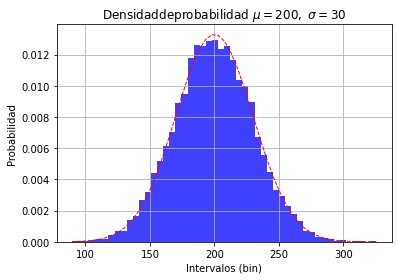

1.0


In [ ]:
# histograma normalizado de los datos (densidad de probabilidad)
fig2 = pylab.figure()
p, bins, patches = pylab.hist(y_datos, nbins,density=True, facecolor='blue', alpha=0.75)

# Ajuste de los datos con una funcion de densidad
# de probabilidad gaussiana:
#y_pdf = mlab.normpdf(bins, mu, sigma)

#x = np.linspace(200, 220, 100)
y_pdf = norm.pdf(bins, mu, sigma)

l = pylab.plot(bins, y_pdf, 'r--', linewidth=1)
pylab.ylabel('Probabilidad')
pylab.xlabel('Intervalos (bin)')
pylab.title(r'$\mathrm{Densidad de probabilidad}\ \mu=200,\ \sigma=30$')
pylab.grid(True)
pylab.show()

# Comprobar que la integral de la función densidad de probabilidad
# es igual a 1:

Integral = sum(p*np.diff(bins))
print(Integral)


Código 3.11: cálculo de matrices de covarianza y correlación entre dos conjuntos
de datos

In [ ]:
from scipy import stats
from numpy import *

# datos:
mu1, sigma1 = 200, 30
x = mu1 + sigma1*random.randn(3).T
mu2, sigma2 = 10, 5
y = mu2 + sigma2*random.randn(3).T

# matriz de covarianza:
covmat = cov(x,y,bias=1)

# matriz de correlación:
corrmat = corrcoef(x,y)

print (covmat)
print (var(x), var(y))

print (corrmat)

# relación entre ambas:
print(cov(x/std(x),y/std(y),bias=1))



[[47.135  8.622]
 [ 8.622  1.803]]
47.13510603374752 1.8034088926996625
[[1.    0.935]
 [0.935 1.   ]]
[[1.    0.935]
 [0.935 1.   ]]


Código 3.12: ejemplo de descomposición ICA en Python

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:469: UserWarning: n_components is too large: it will be set to 2
  % n_components


<Figure size 432x288 with 0 Axes>

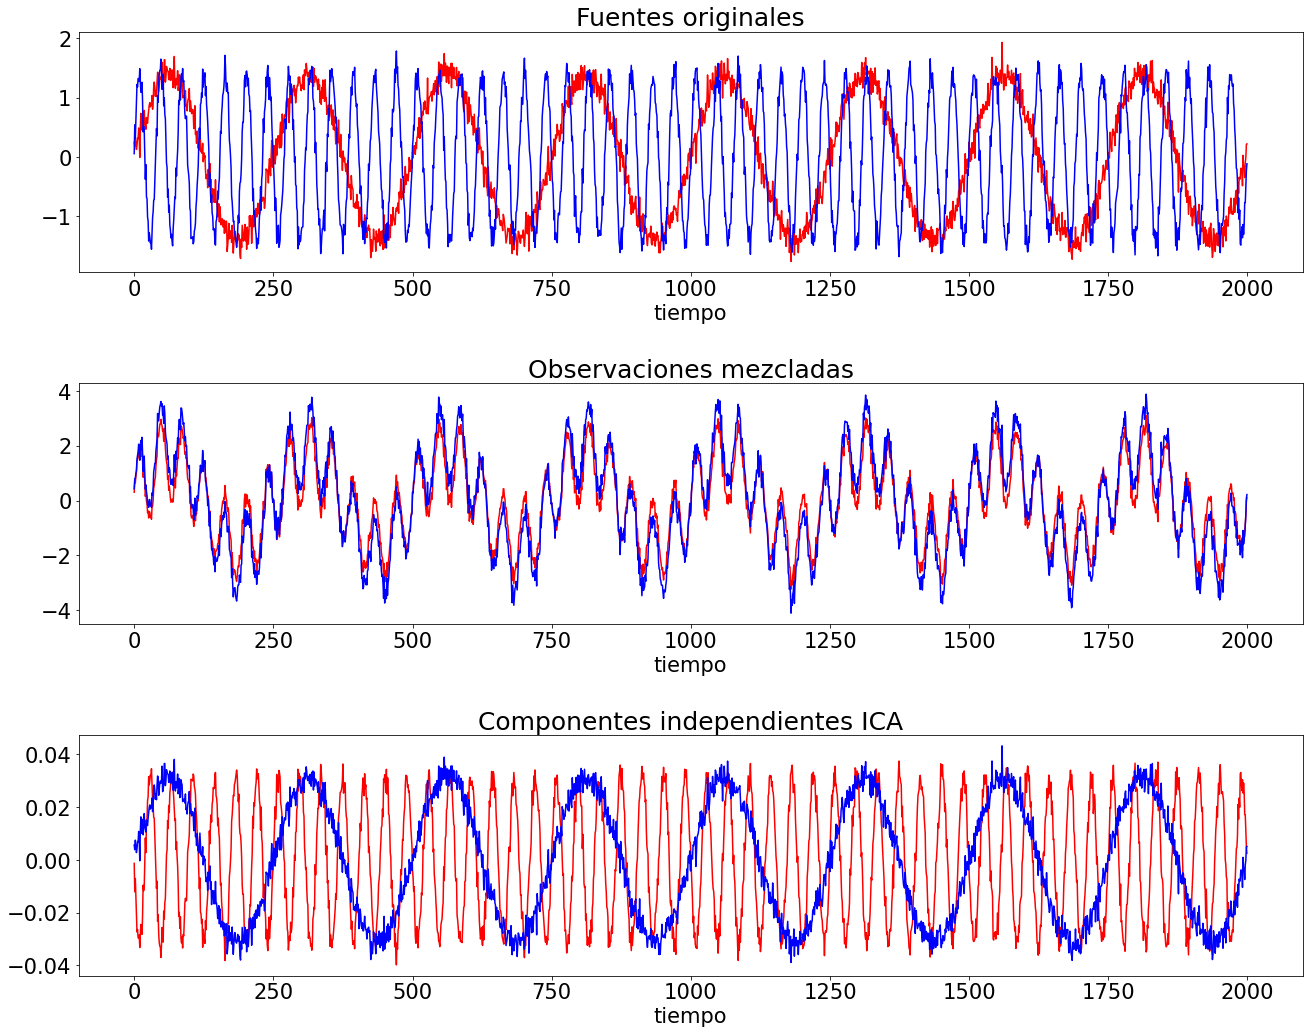

In [ ]:
# –∗– coding : utf –8 –∗–
import numpy as np
import matplotlib.pyplot as plt

# Generar señales sinteticas:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Fuentes originales:
s1 = np.sin(2 *np.pi* time)  # Signal 1 : sinusoidal signal
s2 = np.sin(13 *np.pi* time)  # Signal 1 : sinusoidal signal

S = np.c_[s1, s2]

# Añadir ruido:
S += 0.1 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Estandarizar datos
# Mezclar señales:
A = np.array([[1, 1], [1.5, 1.0]])  # Matriz de mezcla
X = np.dot(S, A.T)  # Observaciones mezcladas

# Descomposicion ICA :
from sklearn.decomposition import FastICA, PCA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruccion ICA

# representacion de resultados :
plt.figure()
plt.figure(figsize=(20,20))

models = [S, X, S_]
names = ['Fuentes originales','Observaciones mezcladas',
         'Componentes independientes ICA']
colors = ['red', 'blue', 'green']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name, size=25)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
        plt.xlabel('tiempo', fontsize=21)
        plt.tick_params(labelsize=21)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

Código 3.13: implementación de NMF en Python descrita en el libro Programming
Collective Intelligence

In [ ]:
import numpy as np
A = np.array([[3,4], [2, 5], [2.1, 1.1], [4.1, 1], [5, 1.8], [3, 4.5]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(A)
F = model.components_
# comprobar que A ~ W*F:
print(A-np.dot(W,F))



[[-1.877e-05  3.315e-05]
 [ 4.570e-05 -8.069e-05]
 [-5.556e-05  9.809e-05]
 [ 1.971e-04 -5.219e-04]
 [-1.527e-04  2.696e-04]
 [-6.298e-06  1.112e-05]]


Código 3.14: lectura de ficheros de texto y creación de diccionarios en Python

In [ ]:
# -*- coding: cp1252 -*-
import glob
import numpy
import string

def textos(path):
    # listar todos los ficheros con extensión .txt del directorio path:
    filelist = glob.glob(path)
    print(filelist)
    docs = []

    # bucle sobre todos los ficheros en el directorio:
    for kfile in filelist:   
        fp = open(kfile) # abrir fichero
        txt = fp.read() # leer fichero
        fp.close() # cerrar fichero
        
        # filtrar caracteres: 
        txt = txt.lower() # convertir a minusculas
        # substituir retornos de carro por espacios
        txt = txt.replace('\n',' ')
        # borrar caracteres ASCII que no sean el espacio
        #(ascii 32), o las letras a-z (ascii 97-122):
        char_ok = [32] + list(range(97,122))
        for i in range(256):
            if i not in char_ok:
                txt = txt.replace(chr(i),'')
                
        # construir una lista con las palabras del texto:
        palabras = txt.split()
        # crear un diccionario:
        dicc = { }
        for ipal in range(len(palabras)):
            pl = palabras[ipal];       
            if len(pl)>4: # excluir palabras de menos de 5 caracteres
                if pl in dicc:
                    dicc[pl].append(ipal) # localización de las apariciones
                else:
                    dicc[pl] = [ipal]
        # añadir número de apariciones al final del diccionario
        for ipal in range(len(palabras)):
            pl = palabras[ipal];
            if pl in dicc:
                #dicc[pl].append(len(dicc[pl])) # número de apariciones
                dicc[pl].insert(0,len(dicc[pl]))
        # agregar diccionario de cada documento           
        docs.append(dicc)        

    return docs

Código 3.15: llamada a la rutina textos para generar una biblioteca de diccionarios
a partir de un conjunto de ficheros de texto

In [ ]:
pwd

'/content/drive/My Drive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb'

In [ ]:
path = os.getcwd() + "/textos/*.txt"
print(path)
docs = textos(path)

/content/drive/My Drive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/textos/*.txt
['/content/drive/My Drive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/textos/lorem_ipsum.txt', '/content/drive/My Drive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/textos/lorem_ipsum_short.txt', '/content/drive/My Drive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/textos/lorem_ipsum_long.txt']


In [ ]:
docs[0]

{'accumsan': [11, 10, 9, 8, 7, 6, 177, 251, 527, 680, 833, 940],
 'adipiscing': [1, 6],
 'aenean': [11, 10, 9, 8, 7, 6, 87, 326, 503, 632, 844, 971],
 'aliquam': [9, 8, 7, 6, 5, 70, 289, 408, 694, 762],
 'aliquet': [11, 10, 9, 8, 7, 6, 38, 354, 375, 561, 854, 943],
 'aptent': [11, 10, 9, 8, 7, 6, 107, 302, 446, 711, 839, 996],
 'auctor': [9, 8, 7, 6, 5, 16, 242, 410, 571, 742],
 'augue': [11, 10, 9, 8, 7, 6, 56, 282, 371, 563, 716, 939],
 'bibendum': [11, 10, 9, 8, 7, 6, 59, 250, 507, 627, 858, 900],
 'blandit': [9, 8, 7, 6, 5, 171, 263, 476, 682, 774],
 'class': [9, 8, 7, 6, 5, 80, 207, 427, 620, 806],
 'commodo': [11, 10, 9, 8, 7, 6, 149, 237, 526, 546, 849, 969],
 'condimentum': [11, 10, 9, 8, 7, 6, 173, 319, 421, 591, 827, 990],
 'congue': [11, 10, 9, 8, 7, 6, 75, 233, 466, 672, 801, 953],
 'consectetur': [1, 5],
 'consequat': [11, 10, 9, 8, 7, 6, 172, 246, 400, 552, 860, 994],
 'conubia': [11, 10, 9, 8, 7, 6, 79, 279, 487, 625, 847, 985],
 'convallis': [11, 10, 9, 8, 7, 6, 17, 271

Código 3.16: matriz palabras


In [ ]:
import numpy
import operator


# obtener un conjunto de diccionarios:
path = os.getcwd() + "/textos/*.txt"
print(path)
docs = textos(path)

# calcular la matriz de recuento de palabras
# tamano N textos x K palabras

dicc_sort = []
# loop over dictionaries
for k in range(len(docs)):
# ordenar diccionario por numero de apariciones
  ds = sorted(docs[k].items(),key=operator.itemgetter(1),reverse=True)
  dicc_sort.append(ds)
# Seleccionar un grupo de K palabras que
# apezcan en los diferentes diccionarios:
print (k)
# listar las 10 palabras más utilizadas en cada texto:
for kw in range(1,10):
    print (ds[kw][0])





/content/drive/My Drive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/textos/*.txt
['/content/drive/My Drive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/textos/lorem_ipsum.txt', '/content/drive/My Drive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/textos/lorem_ipsum_short.txt', '/content/drive/My Drive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/textos/lorem_ipsum_long.txt']
2
tellus
tincidunt
volutpat
elementum
pulvinar
faucibus
consectetur
felis
venenatis


Código 3.17: matrices F,W resultantes

In [ ]:
import numpy as np
A = np.array([[14, 1, 3, 2, 1], [1, 2, 0, 14, 1], [15, 1, 3, 2, 4], [0, 1, 3, 21, 0]])

print("A=")
print(A)

from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(A)
F = model.components_


print("\nF=")
print(F)
print("\nW=")
print(W)



A=
[[14  1  3  2  1]
 [ 1  2  0 14  1]
 [15  1  3  2  4]
 [ 0  1  3 21  0]]

F=
[[2.492e-02 4.719e-01 5.994e-01 6.245e+00 1.138e-01]
 [4.061e+00 2.445e-01 7.736e-01 8.976e-05 7.145e-01]]

W=
[[0.319 3.391]
 [2.232 0.202]
 [0.322 3.742]
 [3.37  0.   ]]


Código 3.18: ejemplo de aplicación del análisis de discriminantes lineales
(LDA)

[1.]
[2.]


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


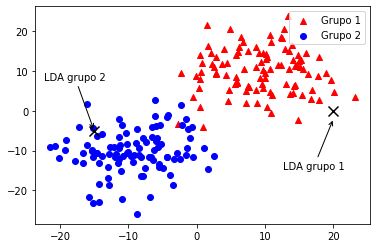

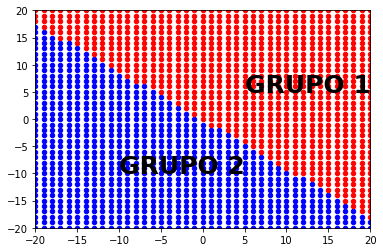

In [ ]:
# –∗– coding : utf –8 –∗–
import numpy as np
import pylab
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Datos gaussianos:
mu1, sigma1 = 10, 5.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Representar gr·ficamente los datos de entrenamiento:
fig1 = pylab.figure()
pylab.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
pylab.scatter(X2[:,0],X2[:,1],marker ='o',c='b')
pylab.legend(('Grupo 1', 'Grupo 2'))

# Concatenar los dos conjuntos de puntos:
XT = np.concatenate((X1,X2))

# Etiquetar los datos como tipo 1 o tipo 2:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Fase de entrenamiento:
clf = LinearDiscriminantAnalysis()
clf.fit(XT, labelT)

#Fase de predicción:
print (clf.predict([[20, 0]])) #predicción para el dato [20,0]
print (clf.predict([[5, -20]]))#predicción para el dato [5,-20]

# Representaciónn de la predicción de los datos [20,0] y [5,-20]:
pylab.scatter(20,0,s=100,marker ='x',c='k')
pylab.annotate('LDA grupo 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))
pylab.scatter(-15,-5,s=100,marker ='x',c='k')
pylab.annotate('LDA grupo 2',xy=(-15,-5),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->"))

# Predicción de datos en una retícula:
fig2 = pylab.figure()
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        # print (i,k,p)
        if p == 1:
            pylab.scatter(i,k,s=20,marker='o',c='r')
        else:
            pylab.scatter(i,k,s=20,marker = 'o',c='b')

pylab.axis([-20,20,-20,20])
pylab.text(5,5,'GRUPO 1',fontsize=25,fontweight='bold',color='k')
pylab.text(-10,-10,'GRUPO 2',fontsize=25,fontweight='bold',color='k')

pylab.show()

Código 3.19: MDS con datos descorrelacionados distribuidos en un espacio

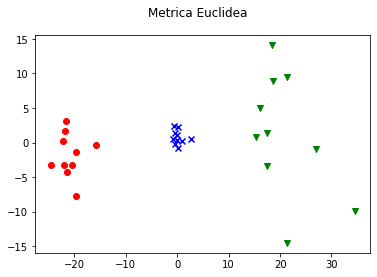

In [ ]:
# –∗– coding : utf –8 –∗–
import numpy as np
import pylab as py

from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)

# Matriz de datos (N variables x M observaciones):
N = 4
M = 30

# Generar datos a partir de 3 clusters diferentes:

X1 = 10 + 2*np.random.randn(int(M/3),N) # cluster 1 (dispersiÛn media)
X2 = -10 + 5*np.random.randn(int(M/3),N) # cluster 2 (dispersiÛn alta)
X3 = 1*np.random.randn(int(M/3),N) # cluster 3 (dispersiÛn baja)

A = np.concatenate((X1,X2,X3))

# TÈcnica MDS: Devuelve la posiciÛn de los datos
# originales en un espacio 2D:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(A)
pos = mds.fit(similarities).embedding_

# RepresentaciÛn de los datos en el espacio 2D MDS:
fig1 = py.figure()
for i in range(0,int(M/3),1):
    py.scatter(pos[i][0],pos[i][1],marker='o',c='r')
for i in range(int(M/3),int(2*M/3),1):
    py.scatter(pos[i][0],pos[i][1],marker='v',c='g')
for i in range(int(2*M/3),M,1):
    py.scatter(pos[i][0],pos[i][1],marker='x',c='b')
fig1.suptitle('Metrica Euclidea')
py.show()

Código 3.20: aplicación de MDS a un conjunto de datos que presentan correlaciones
internas organizadas en tres grupos

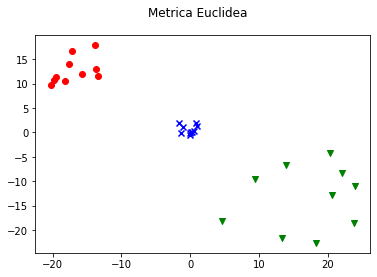

In [ ]:
import numpy as np
import pylab as py

from sklearn import manifold
from sklearn.metrics import euclidean_distances

seed = np.random.RandomState(seed=3)

# Matriz de datos (N variables x M observaciones):
N = 4
M = 30

# Generar datos a partir de 3 clusters diferentes:

X1 = 10 + 2*np.random.randn(int(M/3),N) # cluster 1 (dispersiÛn media)
X2 = -10 + 5*np.random.randn(int(M/3),N) # cluster 2 (dispersiÛn alta)
X3 = 1*np.random.randn(int(M/3),N) # cluster 3 (dispersiÛn baja)

A = np.concatenate((X1,X2,X3))

# TÈcnica MDS: Devuelve la posiciÛn de los datos
# originales en un espacio 2D:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
similarities = euclidean_distances(A)
pos = mds.fit(similarities).embedding_

# RepresentaciÛn de los datos en el espacio 2D MDS:
fig1 = py.figure()
for i in range(0,int(M/3),1):
    py.scatter(pos[i][0],pos[i][1],marker='o',c='r')
for i in range(int(M/3),2*int(M/3),1):
    py.scatter(pos[i][0],pos[i][1],marker='v',c='g')
for i in range(2*int(M/3),M,1):
    py.scatter(pos[i][0],pos[i][1],marker='x',c='b')
fig1.suptitle('Metrica Euclidea')
py.show()